# **Supervised Machine Learning - SML**

In [ ]:
# Standard Library Imports
import datetime as dt
import random

# Data Handling
import pandas as pd
import numpy as np

# Machine Learning & Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Performance Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    make_scorer,
)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from wordcloud import WordCloud

In [ ]:
# Loading data

merged_sentiment = pd.read_csv("merged_sentiment.csv")

## Train Test Split

In [31]:
# Extract y values based on stock type
y_net = merged_sentiment[merged_sentiment["stock"] == "netflix"][
    "return_sign"
].to_numpy()
y_am = merged_sentiment[merged_sentiment["stock"] == "amazon"][
    "return_sign"
].to_numpy()

print("y_net:", y_net)
print("y_am:", y_am)

y_net: ['0' '0' '0' '1' '1' '1' '1' '1' '1' '0' '0' '1' '1' '1' '0' '1' '0' '0'
 '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1'
 '1' '0' '1' '1' '1' '1' '1' '0' '1' '0' '1' '0' '1' '1' '1' '1' '0' '0'
 '1' '1' '0' '0' '1' '0' '1' '0' '0' '1' '1' '1' '0' '0' '0' '0' '0' '1'
 '1' '0' '0' '0' '1' '0' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '1' '0' '0' '1'
 '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '1' '1'
 '0' '0' '0' '1' '0' '1' '1' '0' '1' '0' '1' '1' '0' '1' '0' '0' '0' '1'
 '0' '1' '0' '1' '0' '0' '0' '1' '1' '0' '1' '1' '1' '1' '1' '1' '0' '1'
 '0' '0']
y_am: ['0' '1' '1' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1' '1' '1' '1' '1' '0'
 '1' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '1'
 '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '0' '1' '0' '0' '0' '1' '1' '0'
 '0' '1' '0' '1' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '1' '0' '0' '0'
 '0' '0' '0' '0' '0' '1' '1'

In [33]:
# Train test split netflix
random_seed_val = 100

x_net = (
    merged_sentiment[merged_sentiment["stock"] == "netflix"]
    .iloc[:, 2:5]
    .to_numpy()
)

x_net_train, x_net_test, y_net_train, y_net_test = train_test_split(
    x_net, y_net, test_size=0.2, shuffle=False
)

In [34]:
# Train test split amazon
x_am = (
    merged_sentiment[merged_sentiment["stock"] == "amazon"]
    .iloc[:, 2:5]
    .to_numpy()
)

x_am_train, x_am_test, y_am_train, y_am_test = train_test_split(
    x_am, y_am, test_size=0.2, shuffle=False
)

In [35]:
print(x_net_train.shape)
print(x_am_train.shape)

print(x_net_test.shape)
print(x_am_test.shape)

(131, 3)
(143, 3)
(33, 3)
(36, 3)


In [36]:
y_net_train = y_net_train.astype(int)
y_net_test = y_net_test.astype(int)
y_am_train = y_am_train.astype(int)
y_am_test = y_am_test.astype(int)

In [39]:
# scaling the data
scaler_netflix = StandardScaler()
scaler_amazon = StandardScaler()

netflix_train_scaled = scaler_netflix.fit_transform(x_net_train)
netflix_test_scaled = scaler_netflix.transform(x_net_test)

amazon_train_scaled = scaler_amazon.fit_transform(x_am_train)
amazon_test_scaled = scaler_amazon.transform(x_am_test)

## The Models (LR, MLP and SVM)

### Logistic Regression

In [43]:
# logistic regression

datasets_scaled = {
    "netflix": (netflix_train_scaled, y_net_train),
    "amazon": (amazon_train_scaled, y_am_train),
}

log_models = {}

for name, (train_scaled, y_train) in datasets_scaled.items():
    model = LogisticRegression(
        C=0.3, class_weight="balanced", random_state=100
    )
    model.fit(train_scaled, y_train)
    log_models[name] = model

# predictions
y_net_pred_lr = log_models["netflix"].predict(netflix_test_scaled)
y_am_pred_lr = log_models["amazon"].predict(amazon_test_scaled)


# Function to evaluate multiple metrics dynamically
def evaluate_model(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
    }


# Define datasets for evaluation
datasets = {
    "Netflix": (y_net_test, y_net_pred_lr),
    "Amazon": (y_am_test, y_am_pred_lr),
}

# Metrics to check
metrics_to_check = ["accuracy", "precision", "recall", "f1"]

# Evaluate all models
for stock, (y_true, y_pred) in datasets.items():
    results = evaluate_model(y_true, y_pred)
    for metric in metrics_to_check:
        print(f"{stock} {metric.capitalize()}: {results[metric]:.4f}")

Netflix Accuracy: 0.5455
Netflix Precision: 0.6667
Netflix Recall: 0.3333
Netflix F1: 0.4444
Amazon Accuracy: 0.4444
Amazon Precision: 0.3529
Amazon Recall: 0.4000
Amazon F1: 0.3750


### MLP

In [42]:
# Define scaled datasets
datasets_scaled = {
    "netflix": (netflix_train_scaled, y_net_train),
    "amazon": (amazon_train_scaled, y_am_train),
}

mlp_models = {}

# Train MLP models for each dataset
for name, (train_scaled, y_train) in datasets_scaled.items():
    model = MLPClassifier(
        hidden_layer_sizes=(50, 30),
        activation="relu",
        solver="lbfgs",
        alpha=0.001,
        random_state=100,
        max_iter=3000,
    )
    model.fit(train_scaled, y_train)
    mlp_models[name] = model

# Predictions
y_net_pred_mlp = mlp_models["netflix"].predict(netflix_test_scaled)
y_am_pred_mlp = mlp_models["amazon"].predict(amazon_test_scaled)


# Evaluation function
def evaluate_model(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
    }


# Define test sets
datasets = {
    "Netflix": (y_net_test, y_net_pred_mlp),
    "Amazon": (y_am_test, y_am_pred_mlp),
}

metrics_to_check = ["accuracy", "precision", "recall", "f1"]

# Evaluate all models
for stock, (y_true, y_pred) in datasets.items():
    results = evaluate_model(y_true, y_pred)
    for metric in metrics_to_check:
        print(f"{stock} {metric.capitalize()}: {results[metric]:.4f}")

Netflix Accuracy: 0.4545
Netflix Precision: 0.5000
Netflix Recall: 0.6667
Netflix F1: 0.5714
Amazon Accuracy: 0.6111
Amazon Precision: 0.5200
Amazon Recall: 0.8667
Amazon F1: 0.6500


### SVM

In [45]:
# Define scaled datasets
datasets_scaled = {
    "netflix": (netflix_train_scaled, y_net_train),
    "amazon": (amazon_train_scaled, y_am_train),
}

svm_models = {}

# Train SVM models for each dataset
for name, (train_scaled, y_train) in datasets_scaled.items():
    model = SVC(C=1.0, kernel="rbf", class_weight="balanced", random_state=100)
    model.fit(train_scaled, y_train)
    svm_models[name] = model

# Predictions
y_net_pred_svm = svm_models["netflix"].predict(netflix_test_scaled)
y_am_pred_svm = svm_models["amazon"].predict(amazon_test_scaled)


# Evaluation function
def evaluate_model(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
    }


# Define test sets
datasets = {
    "Netflix": (y_net_test, y_net_pred_svm),
    "Amazon": (y_am_test, y_am_pred_svm),
}

metrics_to_check = ["accuracy", "precision", "recall", "f1"]

# Evaluate all models
for stock, (y_true, y_pred) in datasets.items():
    results = evaluate_model(y_true, y_pred)
    for metric in metrics_to_check:
        print(f"{stock} {metric.capitalize()}: {results[metric]:.4f}")

Netflix Accuracy: 0.4242
Netflix Precision: 0.4706
Netflix Recall: 0.4444
Netflix F1: 0.4571
Amazon Accuracy: 0.5000
Amazon Precision: 0.4400
Amazon Recall: 0.7333
Amazon F1: 0.5500


### Model Performance Comparison - Plots

In [49]:
# Model performance on training set
# Compute accuracy for each model
train_accuracy = np.array(
    [
        accuracy_score(
            y_net_train, log_models["netflix"].predict(netflix_train_scaled)
        ),
        accuracy_score(
            y_net_train, mlp_models["netflix"].predict(netflix_train_scaled)
        ),
        accuracy_score(
            y_net_train, svm_models["netflix"].predict(netflix_train_scaled)
        ),
        accuracy_score(
            y_am_train, log_models["amazon"].predict(amazon_train_scaled)
        ),
        accuracy_score(
            y_am_train, mlp_models["amazon"].predict(amazon_train_scaled)
        ),
        accuracy_score(
            y_am_train, svm_models["amazon"].predict(amazon_train_scaled)
        ),
    ]
)

# Compute recall for each model
train_recall = np.array(
    [
        recall_score(
            y_net_train, log_models["netflix"].predict(netflix_train_scaled)
        ),
        recall_score(
            y_net_train, mlp_models["netflix"].predict(netflix_train_scaled)
        ),
        recall_score(
            y_net_train, svm_models["netflix"].predict(netflix_train_scaled)
        ),
        recall_score(
            y_am_train, log_models["amazon"].predict(amazon_train_scaled)
        ),
        recall_score(
            y_am_train, mlp_models["amazon"].predict(amazon_train_scaled)
        ),
        recall_score(
            y_am_train, svm_models["amazon"].predict(amazon_train_scaled)
        ),
    ]
)

# Compute precision for each model
train_precision = np.array(
    [
        precision_score(
            y_net_train, log_models["netflix"].predict(netflix_train_scaled)
        ),
        precision_score(
            y_net_train, mlp_models["netflix"].predict(netflix_train_scaled)
        ),
        precision_score(
            y_net_train, svm_models["netflix"].predict(netflix_train_scaled)
        ),
        precision_score(
            y_am_train, log_models["amazon"].predict(amazon_train_scaled)
        ),
        precision_score(
            y_am_train, mlp_models["amazon"].predict(amazon_train_scaled)
        ),
        precision_score(
            y_am_train, svm_models["amazon"].predict(amazon_train_scaled)
        ),
    ]
)

# Compute F1-score for each model
train_f1 = np.array(
    [
        f1_score(
            y_net_train, log_models["netflix"].predict(netflix_train_scaled)
        ),
        f1_score(
            y_net_train, mlp_models["netflix"].predict(netflix_train_scaled)
        ),
        f1_score(
            y_net_train, svm_models["netflix"].predict(netflix_train_scaled)
        ),
        f1_score(
            y_am_train, log_models["amazon"].predict(amazon_train_scaled)
        ),
        f1_score(
            y_am_train, mlp_models["amazon"].predict(amazon_train_scaled)
        ),
        f1_score(
            y_am_train, svm_models["amazon"].predict(amazon_train_scaled)
        ),
    ]
)

# Store results in DataFrame
df_train_performance = pd.DataFrame(
    [train_accuracy, train_recall, train_precision, train_f1]
).T
df_train_performance.columns = ["Accuracy", "Recall", "Precision", "F1-score"]

# Labels for models & datasets
df_train_performance.index = [
    "LG-Netflix",
    "MLP-Netflix",
    "SVM-Netflix",
    "LG-Amazon",
    "MLP-Amazon",
    "SVM-Amazon",
]

# Display results
df_train_performance.head(6)

,Accuracy,Recall,Precision,F1-score
LG-Netflix,0.503817,0.471429,0.540984,0.503817
MLP-Netflix,0.725191,0.785714,0.723684,0.753425
SVM-Netflix,0.618321,0.471429,0.717391,0.568966
LG-Amazon,0.524476,0.448718,0.583333,0.507246
MLP-Amazon,0.748252,0.871795,0.723404,0.790698
SVM-Amazon,0.643357,0.666667,0.675325,0.670968


In [50]:
# Model performance on test set
# Compute accuracy for each model
met_accuracy = np.array(
    [
        accuracy_score(y_net_test, y_net_pred_lr),
        accuracy_score(y_net_test, y_net_pred_mlp),
        accuracy_score(y_net_test, y_net_pred_svm),
        accuracy_score(y_am_test, y_am_pred_lr),
        accuracy_score(y_am_test, y_am_pred_mlp),
        accuracy_score(y_am_test, y_am_pred_svm),
    ]
)

# Compute recall for each model
met_recall = np.array(
    [
        recall_score(y_net_test, y_net_pred_lr),
        recall_score(y_net_test, y_net_pred_mlp),
        recall_score(y_net_test, y_net_pred_svm),
        recall_score(y_am_test, y_am_pred_lr),
        recall_score(y_am_test, y_am_pred_mlp),
        recall_score(y_am_test, y_am_pred_svm),
    ]
)

# Compute precision for each model
met_precision = np.array(
    [
        precision_score(y_net_test, y_net_pred_lr),
        precision_score(y_net_test, y_net_pred_mlp),
        precision_score(y_net_test, y_net_pred_svm),
        precision_score(y_am_test, y_am_pred_lr),
        precision_score(y_am_test, y_am_pred_mlp),
        precision_score(y_am_test, y_am_pred_svm),
    ]
)

# Compute f1 for each model
met_f1 = np.array(
    [
        f1_score(y_net_test, y_net_pred_lr),
        f1_score(y_net_test, y_net_pred_mlp),
        f1_score(y_net_test, y_net_pred_svm),
        f1_score(y_am_test, y_am_pred_lr),
        f1_score(y_am_test, y_am_pred_mlp),
        f1_score(y_am_test, y_am_pred_svm),
    ]
)

# Store results in DataFrame
df_performance = pd.DataFrame(
    [met_accuracy, met_recall, met_precision, met_f1]
).T
df_performance.columns = ["Accuracy", "Recall", "Precision", "f1"]

# Correct labels for models & datasets
df_performance.index = [
    "LG-Netflix",
    "MLP-Netflix",
    "SVM-Netflix",
    "LG-Amazon",
    "MLP-Amazon",
    "SVM-Amazon",
]

# Display results
df_performance.head(6)

,Accuracy,Recall,Precision,f1
LG-Netflix,0.545455,0.333333,0.666667,0.444444
MLP-Netflix,0.454545,0.666667,0.500000,0.571429
SVM-Netflix,0.424242,0.444444,0.470588,0.457143
LG-Amazon,0.444444,0.400000,0.352941,0.375000
MLP-Amazon,0.611111,0.866667,0.520000,0.650000
SVM-Amazon,0.500000,0.733333,0.440000,0.550000


<Figure size 1000x600 with 0 Axes>

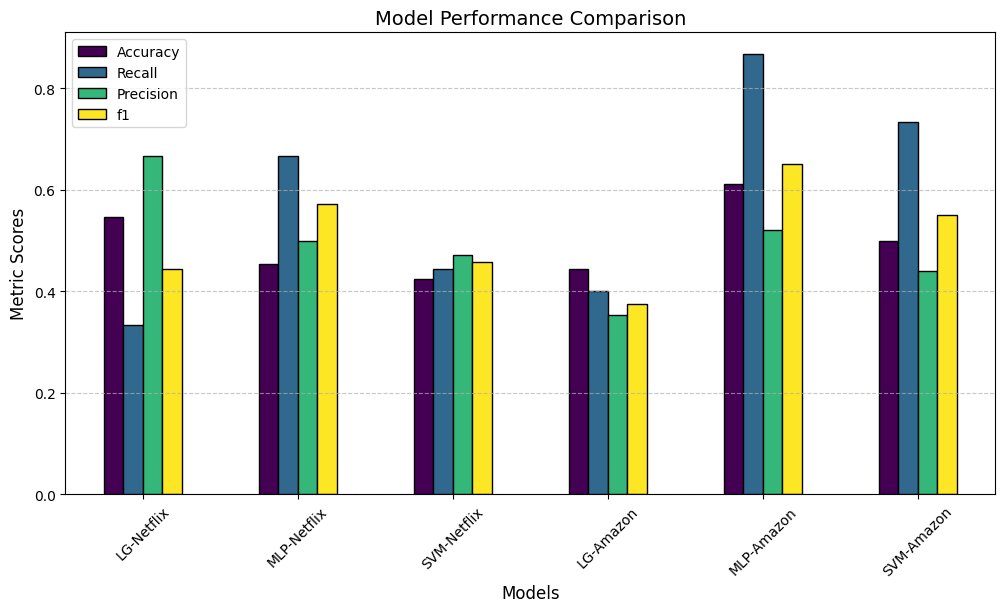

In [51]:
# Plot comparison
plt.figure(figsize=(10, 6))
df_performance.plot(
    kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black"
)

plt.title("Model Performance Comparison", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Metric Scores", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc="best", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

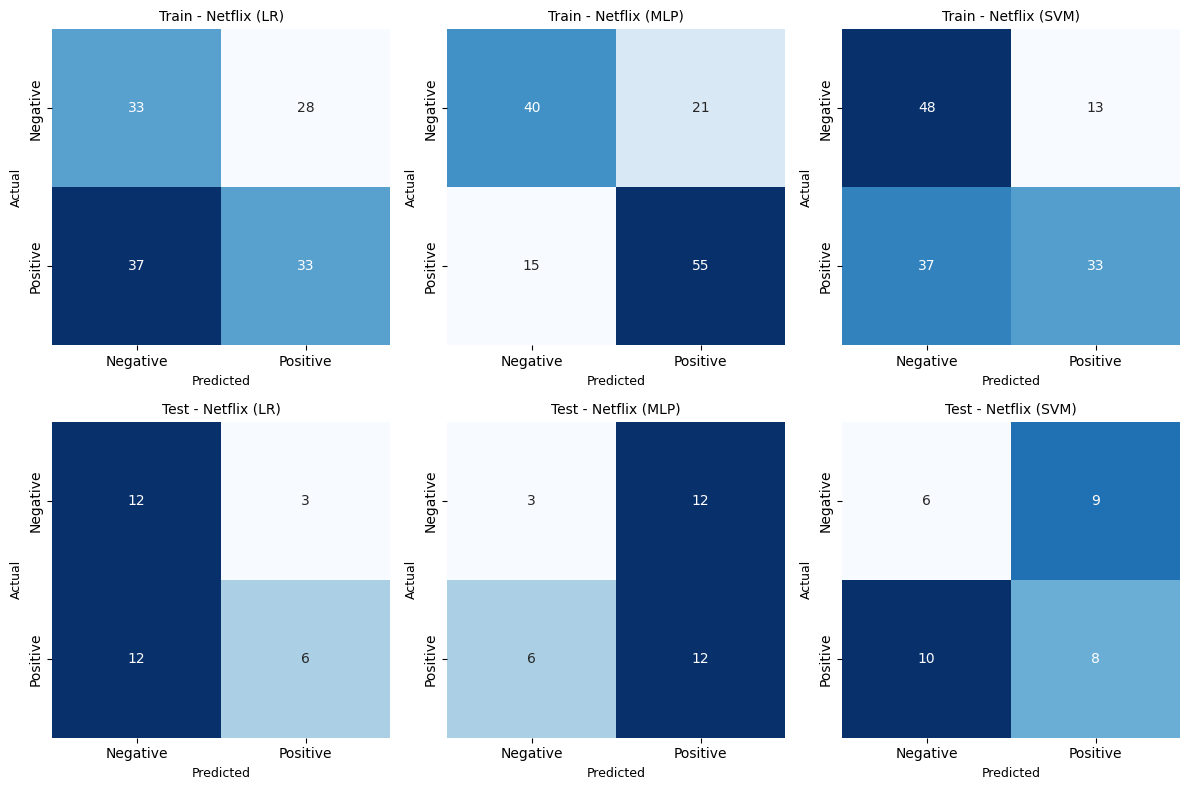

In [53]:
# Function to plot confusion matrix
def plot_conf_matrix(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        xticklabels=["Negative", "Positive"],
        yticklabels=["Negative", "Positive"],
        ax=ax,
    )
    ax.set_title(title, fontsize=10)
    ax.set_xlabel("Predicted", fontsize=9)
    ax.set_ylabel("Actual", fontsize=9)


# Create figure with multiple subplots
fig, axes = plt.subplots(
    nrows=2, ncols=3, figsize=(12, 8)
)  # Adjusted size for compact view

# Train set matrices
plot_conf_matrix(
    axes[0, 0],
    y_net_train,
    log_models["netflix"].predict(netflix_train_scaled),
    "Train - Netflix (LR)",
)
plot_conf_matrix(
    axes[0, 1],
    y_net_train,
    mlp_models["netflix"].predict(netflix_train_scaled),
    "Train - Netflix (MLP)",
)
plot_conf_matrix(
    axes[0, 2],
    y_net_train,
    svm_models["netflix"].predict(netflix_train_scaled),
    "Train - Netflix (SVM)",
)

# Test set matrices
plot_conf_matrix(axes[1, 0], y_net_test, y_net_pred_lr, "Test - Netflix (LR)")
plot_conf_matrix(
    axes[1, 1], y_net_test, y_net_pred_mlp, "Test - Netflix (MLP)"
)
plot_conf_matrix(
    axes[1, 2], y_net_test, y_net_pred_svm, "Test - Netflix (SVM)"
)

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

# Hyper-Parameter Tuning

### Logistic Regression

In [55]:
# Define scorer (optimize for F1-score due to slight class imbalance)
scorer = make_scorer(f1_score)

# Define smaller, optimized parameter grid
parameter_space_lr = {
    "penalty": ["l1", "l2"],  # Limited options for regularization
    "C": [0.01, 0.1, 1, 10],  # Controls regularization strength
    "solver": [
        "liblinear",
        "saga",
    ],  # Efficient solvers for small-scale tuning
    "max_iter": [100, 500],  # Lower iterations for faster convergence
}

# Run GridSearch for both datasets
best_params_lr = {}

for dataset_name, (train_scaled, y_train) in datasets_scaled.items():
    print(f"Running GridSearchCV for {dataset_name}...")

    lr_tune = LogisticRegression(random_state=100)
    GSCV_lr = GridSearchCV(
        lr_tune, parameter_space_lr, n_jobs=-1, cv=3, scoring=scorer
    )

    GSCV_lr.fit(train_scaled, y_train)

    best_params_lr[dataset_name] = GSCV_lr.best_params_
    print(f"Best Parameters for {dataset_name}: {GSCV_lr.best_params_}")

# Store results in DataFrame for easy comparison
df_best_params_lr = pd.DataFrame(best_params_lr).T
df_best_params_lr

NameError: name 'make_scorer' is not defined

In [57]:
# Define optimized Logistic Regression models for Netflix and Amazon
optimized_lr_models = {}

best_params_lr = {
    "penalty": "l2",
    "C": 0.05,
    "solver": "liblinear",  # Using liblinear for small datasets
    "max_iter": 200,
    "random_state": 100,
}

# Train Logistic Regression models with optimized parameters
for name, (train_scaled, y_train) in datasets_scaled.items():
    model = LogisticRegression(**best_params_lr)
    model.fit(train_scaled, y_train)
    optimized_lr_models[name] = model

# Generate predictions
threshold = 0.51  # Adjust this for better precision vs recall balance, as it gives an irrealistic high recall - the default is 0.5

y_net_pred_probs = optimized_lr_models["netflix"].predict_proba(
    netflix_test_scaled
)
y_am_pred_probs = optimized_lr_models["amazon"].predict_proba(
    amazon_test_scaled
)

y_net_pred_lr_opt = (y_net_pred_probs[:, 1] > threshold).astype(int)
y_am_pred_lr_opt = (y_am_pred_probs[:, 1] > threshold).astype(int)

# Evaluate the optimized model
datasets_opt_lr = {
    "Netflix": (y_net_test, y_net_pred_lr_opt),
    "Amazon": (y_am_test, y_am_pred_lr_opt),
}

metrics_to_check = ["accuracy", "precision", "recall", "f1"]

# Print optimized evaluation results
for stock, (y_true, y_pred) in datasets_opt_lr.items():
    results = evaluate_model(y_true, y_pred)
    for metric in metrics_to_check:
        print(
            f"{stock} {metric.capitalize()} (Optimized Logistic Regression): {results[metric]:.4f}"
        )

19:80: E501 line too long (131 > 79 characters)
44:80: E501 line too long (99 > 79 characters)


Netflix Accuracy (Optimized Logistic Regression): 0.5152
Netflix Precision (Optimized Logistic Regression): 0.6000
Netflix Recall (Optimized Logistic Regression): 0.3333
Netflix F1 (Optimized Logistic Regression): 0.4286
Amazon Accuracy (Optimized Logistic Regression): 0.4722
Amazon Precision (Optimized Logistic Regression): 0.4375
Amazon Recall (Optimized Logistic Regression): 0.9333
Amazon F1 (Optimized Logistic Regression): 0.5957


### MLP

In [58]:
# Define scorer (optimize for F1-score in this case due to slightly imbalanced data set)
scorer = make_scorer(f1_score)

# Define parameter grid
parameter_space_mlp = {
    "hidden_layer_sizes": [
        (50,),
        (100,),
        (50, 30),
        (100, 50, 30),
        (200, 100, 50),
    ],
    "activation": ["tanh", "relu", "logistic"],
    "solver": ["adam", "sgd", "lbfgs"],
    "alpha": [0.0001, 0.001, 0.005, 0.01],
    "learning_rate": ["constant", "adaptive", "invscaling"],
    "max_iter": [200, 500, 1000, 3000],
}

# Run GridSearch for both datasets
best_params = {}

for dataset_name, (train_scaled, y_train) in datasets_scaled.items():
    print(f"Running GridSearchCV for {dataset_name}...")

    mlp_tune = MLPClassifier(random_state=100)
    GSCV_mlp = GridSearchCV(
        mlp_tune, parameter_space_mlp, n_jobs=-1, cv=3, scoring=scorer
    )

    GSCV_mlp.fit(train_scaled, y_train)

    best_params[dataset_name] = GSCV_mlp.best_params_
    print(f"Best Parameters for {dataset_name}: {GSCV_mlp.best_params_}")

# Store results in a DataFrame for easy comparison
df_best_params = pd.DataFrame(best_params).T
df_best_params

NameError: name 'make_scorer' is not defined

1:80: E501 line too long (88 > 79 characters)


In [59]:
# Define optimized MLP models for Netflix and Amazon
optimized_mlp_models = {}

best_params = {
    "activation": "relu",
    "alpha": 0.02,
    "hidden_layer_sizes": (50,),
    "learning_rate": "adaptive",
    "max_iter": 500,
    "solver": "sgd",
    "random_state": 100,  # Keep this fixed for consistency
}

# Train MLP models with optimized parameters
for name, (train_scaled, y_train) in datasets_scaled.items():
    model = MLPClassifier(**best_params)
    model.fit(train_scaled, y_train)
    optimized_mlp_models[name] = model

# Generate predictions
y_net_pred_mlp_opt = optimized_mlp_models["netflix"].predict(
    netflix_test_scaled
)
y_am_pred_mlp_opt = optimized_mlp_models["amazon"].predict(amazon_test_scaled)

# Evaluate the optimized model
datasets_opt = {
    "Netflix": (y_net_test, y_net_pred_mlp_opt),
    "Amazon": (y_am_test, y_am_pred_mlp_opt),
}

metrics_to_check = ["accuracy", "precision", "recall", "f1"]

for stock, (y_true, y_pred) in datasets_opt.items():
    results = evaluate_model(y_true, y_pred)
    for metric in metrics_to_check:
        print(
            f"{stock} {metric.capitalize()} (Optimized): {results[metric]:.4f}"
        )

# note that with using the best parameters, recall was 1 which is unrealistic so I used slightly different parameters to improve, i.e. switched to relu as it handles class imbalances better than logistic, increased alpha to 0.02

41:80: E501 line too long (228 > 79 characters)


Netflix Accuracy (Optimized): 0.4848
Netflix Precision (Optimized): 0.5238
Netflix Recall (Optimized): 0.6111
Netflix F1 (Optimized): 0.5641
Amazon Accuracy (Optimized): 0.4444
Amazon Precision (Optimized): 0.4194
Amazon Recall (Optimized): 0.8667
Amazon F1 (Optimized): 0.5652


### SVM

In [60]:




# Define scorer (optimize for F1-score due to slight class imbalance)
scorer = make_scorer(f1_score)

# Define optimized parameter grid for SVM
parameter_space_svm = {
    "C": [0.01, 0.1, 1, 10],  # Regularization strength
    "kernel": [
        "linear",
        "rbf",
    ],  # Different kernel types (skipped poly cause computationally expensive)
    "gamma": [
        "scale",
        "auto",
    ],  # Kernel coefficient (affects non-linear models)
    "class_weight": [None, "balanced"],  # Adjusts for imbalanced datasets
}

# Run GridSearch for both datasets
best_params_svm = {}

for dataset_name, (train_scaled, y_train) in datasets_scaled.items():
    print(f"Running GridSearchCV for {dataset_name}...")

    svm_tune = SVC(random_state=100)
    GSCV_svm = GridSearchCV(
        svm_tune, parameter_space_svm, n_jobs=-1, cv=3, scoring=scorer
    )

    GSCV_svm.fit(train_scaled, y_train)

    best_params_svm[dataset_name] = GSCV_svm.best_params_
    print(f"Best Parameters for {dataset_name}: {GSCV_svm.best_params_}")

# Store results in DataFrame for easy comparison
df_best_params_svm = pd.DataFrame(best_params_svm).T
df_best_params_svm

Running GridSearchCV for netflix...
Best Parameters for netflix: {'C': 0.01, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
Running GridSearchCV for amazon...
Best Parameters for amazon: {'C': 0.01, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}


,C,class_weight,gamma,kernel
netflix,0.01,None,scale,linear
amazon,0.01,None,scale,linear


52:80: E501 line too long (83 > 79 characters)


In [63]:
# Define optimized SVM models for Netflix and Amazon
optimized_svm_models = {}

best_params_svm = {
    "C": 0.25,
    "kernel": "poly",
    "gamma": "scale",
    "class_weight": "balanced",
    "probability": True,
    "random_state": 100,
}
# Note that im using poly instead of linear due to recall of 1 otherwise

# Train SVM models with optimized parameters
for name, (train_scaled, y_train) in datasets_scaled.items():
    model = SVC(**best_params_svm)
    model.fit(train_scaled, y_train)
    optimized_svm_models[name] = model

# Generate predictions
# Define threshold
threshold = 0.48  # Adjust this as needed

# Get prediction probabilities
y_net_pred_probs = optimized_svm_models["netflix"].predict_proba(
    netflix_test_scaled
)
y_am_pred_probs = optimized_svm_models["amazon"].predict_proba(
    amazon_test_scaled
)

# Apply thresholding
y_net_pred_svm_opt = (y_net_pred_probs[:, 1] > threshold).astype(int)
y_am_pred_svm_opt = (y_am_pred_probs[:, 1] > threshold).astype(int)

# Evaluate the optimized model
datasets_opt_svm = {
    "Netflix": (y_net_test, y_net_pred_svm_opt),
    "Amazon": (y_am_test, y_am_pred_svm_opt),
}

metrics_to_check = ["accuracy", "precision", "recall", "f1"]

# Print optimized evaluation results
for stock, (y_true, y_pred) in datasets_opt_svm.items():
    results = evaluate_model(y_true, y_pred)
    for metric in metrics_to_check:
        print(
            f"{stock} {metric.capitalize()} (Optimized SVM): {results[metric]:.4f}"
        )

49:80: E501 line too long (83 > 79 characters)


Netflix Accuracy (Optimized SVM): 0.5152
Netflix Precision (Optimized SVM): 0.5312
Netflix Recall (Optimized SVM): 0.9444
Netflix F1 (Optimized SVM): 0.6800
Amazon Accuracy (Optimized SVM): 0.3889
Amazon Precision (Optimized SVM): 0.4000
Amazon Recall (Optimized SVM): 0.9333
Amazon F1 (Optimized SVM): 0.5600


In [64]:
# Initialize list to store results dynamically
metrics_results = []

# Define datasets containing previously computed results
datasets_opt_all = {
    "SVM": datasets_opt_svm,  # Contains optimized SVM results
    "Logistic Regression": datasets_opt_lr,  # Contains optimized LR results
    "MLP": datasets_opt,  # Contains optimized MLP results
}

# Loop through each model type and stock
for model_name, dataset in datasets_opt_all.items():
    for stock, (y_true, y_pred) in dataset.items():
        results = evaluate_model(
            y_true, y_pred
        )  # Pull previously computed metrics

        # Store results dynamically
        metrics_results.append(
            {
                "Model": model_name,
                "Stock": stock,
                **{
                    metric: results[metric]
                    for metric in ["accuracy", "precision", "recall", "f1"]
                },
            }
        )

# Convert list into DataFrame
df_metrics = pd.DataFrame(metrics_results)

# Display consolidated metrics
df_metrics

,Model,Stock,accuracy,precision,recall,f1
0,SVM,Netflix,0.515152,0.531250,0.944444,0.680000
1,SVM,Amazon,0.388889,0.400000,0.933333,0.560000
2,Logistic Regression,Netflix,0.515152,0.600000,0.333333,0.428571
3,Logistic Regression,Amazon,0.472222,0.437500,0.933333,0.595745
4,MLP,Netflix,0.484848,0.523810,0.611111,0.564103
5,MLP,Amazon,0.444444,0.419355,0.866667,0.565217



#  **Trading Strategy**

In [65]:
# Get the best model for each stock based on highest precision
best_netflix_model_name = (
    df_metrics[df_metrics["Stock"] == "Netflix"]
    .sort_values(by="precision", ascending=False)
    .iloc[0]["Model"]
)
best_amazon_model_name = (
    df_metrics[df_metrics["Stock"] == "Amazon"]
    .sort_values(by="precision", ascending=False)
    .iloc[0]["Model"]
)

print(f"Best Model for Netflix: {best_netflix_model_name}")
print(f"Best Model for Amazon: {best_amazon_model_name}")

# Retrieve predictions from the selected models
netflix_predictions = datasets_opt_all[best_netflix_model_name]["Netflix"][1]
amazon_predictions = datasets_opt_all[best_amazon_model_name]["Amazon"][1]

# Apply trading rules based on predictions
trade_threshold = 0.50  # Adjust if necessary
netflix_trades = [
    "BUY" if pred > trade_threshold else "SELL" for pred in netflix_predictions
]
amazon_trades = [
    "BUY" if pred > trade_threshold else "SELL" for pred in amazon_predictions
]

# Filter sentiment data separately to match test set sizes
merged_sentiment_netflix = merged_sentiment[
    merged_sentiment["stock"] == "netflix"
].tail(len(netflix_trades))
merged_sentiment_amazon = merged_sentiment[
    merged_sentiment["stock"] == "amazon"
].tail(len(amazon_trades))

# Create separate DataFrames
df_netflix_strategy = pd.DataFrame(
    {"Date": merged_sentiment_netflix["date"], "Netflix Trade": netflix_trades}
)

df_amazon_strategy = pd.DataFrame(
    {"Date": merged_sentiment_amazon["date"], "Amazon Trade": amazon_trades}
)

Best Model for Netflix: Logistic Regression
Best Model for Amazon: Logistic Regression


## Amazon Trading Strategy

In [66]:
# Merge the pred data frame with histdata which contains the level of returns

amazon_returns = merged_sentiment[merged_sentiment["stock"] == "amazon"][
    ["returns", "date"]
]
amazon_returns.rename(columns={"date": "Date"}, inplace=True)

amazon_backtest = df_amazon_strategy.merge(
    amazon_returns, on="Date", how="left"
)

In [67]:
# Buy and hold returns
amazon_backtest["buyandhold"] = (amazon_backtest["returns"] + 1).cumprod()

# Map trade actions to numeric values
amazon_backtest["strategy_multiplier"] = amazon_backtest["Amazon Trade"].map(
    {"BUY": 1, "SELL": -1}
)

# Apply strategy returns calculation
amazon_backtest["strategy_return"] = (
    amazon_backtest["strategy_multiplier"] * amazon_backtest["returns"]
)

# Calculate cumulative strategy return
amazon_backtest["strategy_cumulative"] = (
    amazon_backtest["strategy_return"] + 1
).cumprod()

amazon_backtest

,Date,Amazon Trade,returns,buyandhold,strategy_multiplier,strategy_return,strategy_cumulative
0,2025-01-29,SELL,-0.004535,0.995465,-1,0.004535,1.004535
1,2025-01-31,BUY,0.012956,1.008362,1,0.012956,1.017550
2,2025-02-03,BUY,-0.001094,1.007259,1,-0.001094,1.016437
3,2025-02-04,BUY,0.019543,1.026945,1,0.019543,1.036301
4,2025-02-05,BUY,-0.024333,1.001956,1,-0.024333,1.011085
5,2025-02-06,BUY,0.011263,1.013241,1,0.011263,1.022473
6,2025-02-07,SELL,-0.040531,0.972174,-1,0.040531,1.063915
7,2025-02-13,SELL,0.006290,0.978289,-1,-0.006290,1.057223
8,2025-02-18,BUY,-0.008877,0.969604,1,-0.008877,1.047838
9,2025-02-19,BUY,-0.000088,0.969519,1,-0.000088,1.047745


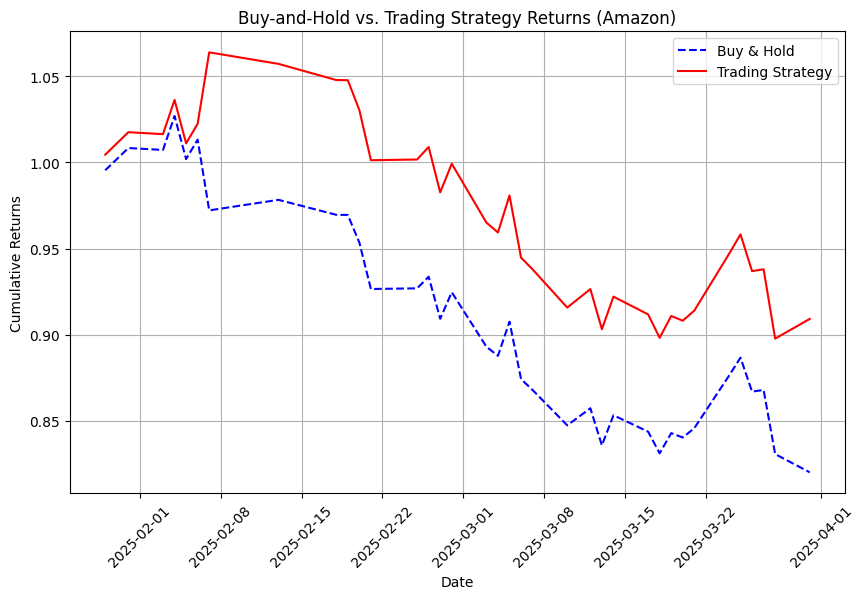

In [68]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot buy-and-hold cumulative returns
plt.plot(
    amazon_backtest["Date"],
    amazon_backtest["buyandhold"],
    label="Buy & Hold",
    linestyle="--",
    color="blue",
)

# Plot strategy cumulative returns
plt.plot(
    amazon_backtest["Date"],
    amazon_backtest["strategy_cumulative"],
    label="Trading Strategy",
    linestyle="-",
    color="red",
)

# Formatting
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Buy-and-Hold vs. Trading Strategy Returns (Amazon)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

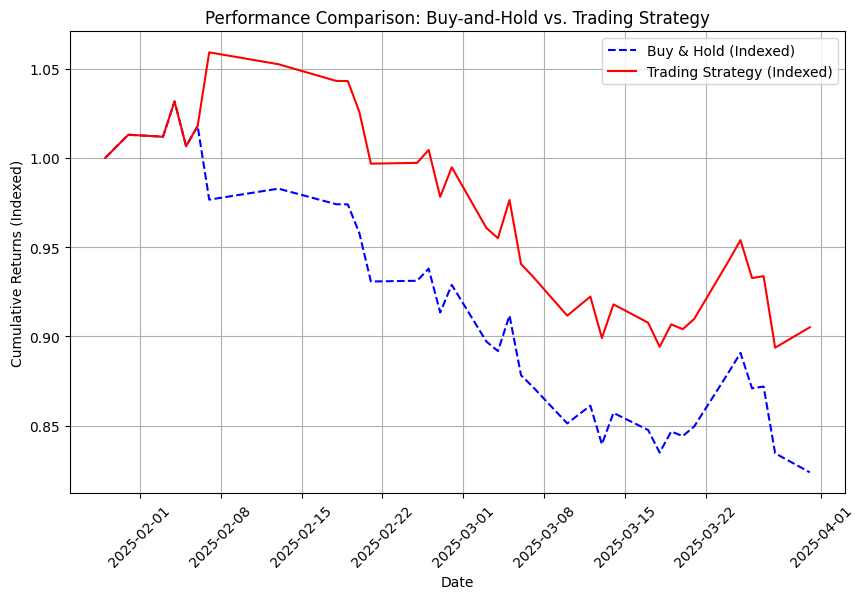

In [69]:
# Normalize buy-and-hold returns to start from 1
amazon_backtest["buyandhold_indexed"] = (
    amazon_backtest["buyandhold"] / amazon_backtest["buyandhold"].iloc[0]
)

# Normalize strategy cumulative returns to start from 1
amazon_backtest["strategy_indexed"] = (
    amazon_backtest["strategy_cumulative"]
    / amazon_backtest["strategy_cumulative"].iloc[0]
)

# Plot indexed returns

plt.figure(figsize=(10, 6))
plt.plot(
    amazon_backtest["Date"],
    amazon_backtest["buyandhold_indexed"],
    label="Buy & Hold (Indexed)",
    linestyle="--",
    color="blue",
)
plt.plot(
    amazon_backtest["Date"],
    amazon_backtest["strategy_indexed"],
    label="Trading Strategy (Indexed)",
    linestyle="-",
    color="red",
)

plt.xlabel("Date")
plt.ylabel("Cumulative Returns (Indexed)")
plt.title("Performance Comparison: Buy-and-Hold vs. Trading Strategy")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [70]:
# Calculate total percentage returns for each strategy
buy_hold_final_return = (amazon_backtest["buyandhold"].iloc[-1] - 1) * 100
strategy_final_return = (
    amazon_backtest["strategy_cumulative"].iloc[-1] - 1
) * 100

# Calculate mean return for each strategy
buy_hold_avg_return = amazon_backtest["buyandhold"].pct_change().mean() * 100
strategy_avg_return = (
    amazon_backtest["strategy_cumulative"].pct_change().mean() * 100
)

# Calculate volatility (standard deviation of returns)
buy_hold_volatility = amazon_backtest["buyandhold"].pct_change().std() * 100
strategy_volatility = (
    amazon_backtest["strategy_cumulative"].pct_change().std() * 100
)

# Calculate max drawdown (largest peak-to-trough decline)
buy_hold_max_drawdown = (
    (amazon_backtest["buyandhold"].max() - amazon_backtest["buyandhold"].min())
    / amazon_backtest["buyandhold"].max()
    * 100
)
strategy_max_drawdown = (
    (
        amazon_backtest["strategy_cumulative"].max()
        - amazon_backtest["strategy_cumulative"].min()
    )
    / amazon_backtest["strategy_cumulative"].max()
    * 100
)

# Create final DataFrame with comparison metrics
amazon_summary_metrics = pd.DataFrame(
    {
        "Metric": [
            "Total Return (%)",
            "Average Daily Return (%)",
            "Volatility (%)",
            "Max Drawdown (%)",
        ],
        "Buy & Hold": [
            buy_hold_final_return,
            buy_hold_avg_return,
            buy_hold_volatility,
            buy_hold_max_drawdown,
        ],
        "Trading Strategy": [
            strategy_final_return,
            strategy_avg_return,
            strategy_volatility,
            strategy_max_drawdown,
        ],
    }
)

# summary metrics
amazon_summary_metrics

,Metric,Buy & Hold,Trading Strategy
0,Total Return (%),-17.990478,-9.081651
1,Average Daily Return (%),-0.532662,-0.264059
2,Volatility (%),1.996070,2.050510
3,Max Drawdown (%),20.142214,15.620659


## Netflix Trading Strategy

In [71]:
# Merge the Pred Data Frame with histdata which contains the level of returns

netflix_returns = merged_sentiment[merged_sentiment["stock"] == "netflix"][
    ["returns", "date"]
]
netflix_returns.rename(columns={"date": "Date"}, inplace=True)

netflix_backtest = df_netflix_strategy.merge(
    netflix_returns, on="Date", how="left"
)

In [72]:
# Buy and hold returns
netflix_backtest["buyandhold"] = (netflix_backtest["returns"] + 1).cumprod()

# Map trade actions to numeric values
netflix_backtest["strategy_multiplier"] = netflix_backtest[
    "Netflix Trade"
].map({"BUY": 1, "SELL": -1})

# Apply strategy returns calculation
netflix_backtest["strategy_return"] = (
    netflix_backtest["strategy_multiplier"] * netflix_backtest["returns"]
)

# Calculate cumulative strategy return
netflix_backtest["strategy_cumulative"] = (
    netflix_backtest["strategy_return"] + 1
).cumprod()

netflix_backtest

,Date,Netflix Trade,returns,buyandhold,strategy_multiplier,strategy_return,strategy_cumulative
0,2025-02-04,SELL,0.016273,1.016273,-1,-0.016273,0.983727
1,2025-02-05,SELL,0.016324,1.032862,-1,-0.016324,0.967669
2,2025-02-07,SELL,-0.001723,1.031082,-1,0.001723,0.969336
3,2025-02-10,SELL,0.013482,1.044984,-1,-0.013482,0.956268
4,2025-02-11,SELL,-0.018996,1.025134,-1,0.018996,0.974433
5,2025-02-12,SELL,0.019076,1.044689,-1,-0.019076,0.955844
6,2025-02-14,SELL,0.014286,1.059613,-1,-0.014286,0.942189
7,2025-02-18,SELL,-0.021491,1.036841,-1,0.021491,0.962438
8,2025-02-19,SELL,0.007221,1.044329,-1,-0.007221,0.955488
9,2025-02-20,SELL,-0.018010,1.025521,-1,0.018010,0.972696


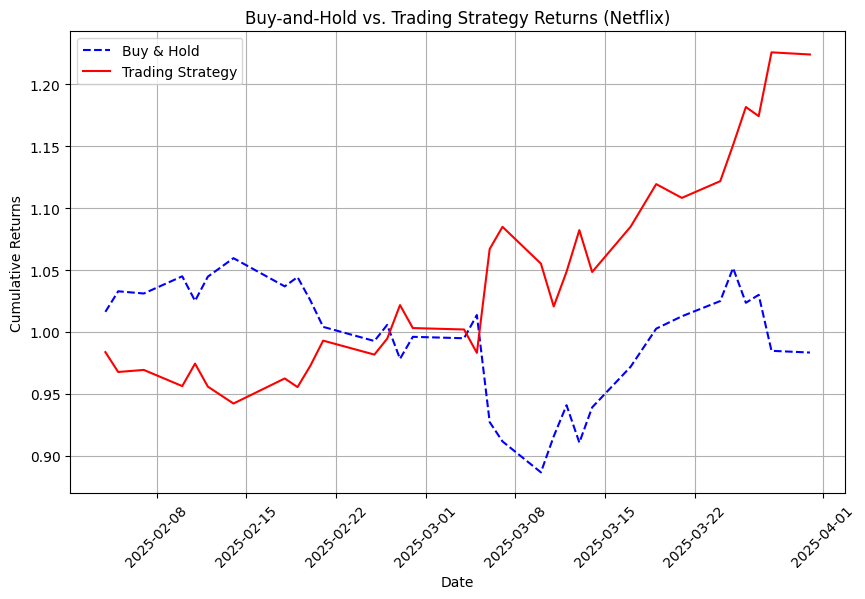

In [73]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot buy-and-hold cumulative returns
plt.plot(
    netflix_backtest["Date"],
    netflix_backtest["buyandhold"],
    label="Buy & Hold",
    linestyle="--",
    color="blue",
)

# Plot strategy cumulative returns
plt.plot(
    netflix_backtest["Date"],
    netflix_backtest["strategy_cumulative"],
    label="Trading Strategy",
    linestyle="-",
    color="red",
)

# Formatting
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Buy-and-Hold vs. Trading Strategy Returns (Netflix)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

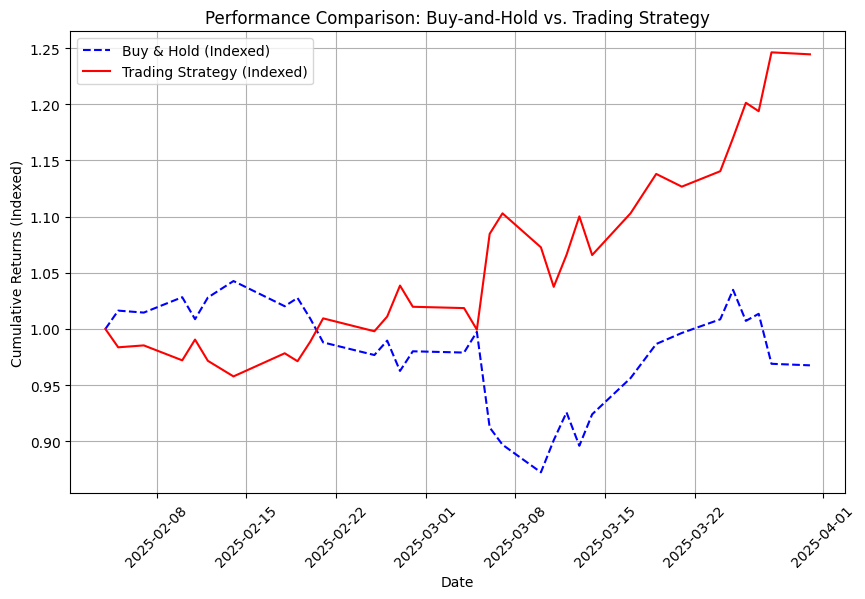

In [75]:
# Normalize buy-and-hold returns to start from 1
netflix_backtest["buyandhold_indexed"] = (
    netflix_backtest["buyandhold"] / netflix_backtest["buyandhold"].iloc[0]
)

# Normalize strategy cumulative returns to start from 1
netflix_backtest["strategy_indexed"] = (
    netflix_backtest["strategy_cumulative"]
    / netflix_backtest["strategy_cumulative"].iloc[0]
)

# Plot indexed returns

plt.figure(figsize=(10, 6))
plt.plot(
    netflix_backtest["Date"],
    netflix_backtest["buyandhold_indexed"],
    label="Buy & Hold (Indexed)",
    linestyle="--",
    color="blue",
)
plt.plot(
    netflix_backtest["Date"],
    netflix_backtest["strategy_indexed"],
    label="Trading Strategy (Indexed)",
    linestyle="-",
    color="red",
)

plt.xlabel("Date")
plt.ylabel("Cumulative Returns (Indexed)")
plt.title("Performance Comparison: Buy-and-Hold vs. Trading Strategy")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [76]:
# Calculate total percentage returns for each strategy
buy_hold_final_return = (netflix_backtest["buyandhold"].iloc[-1] - 1) * 100
strategy_final_return = (
    netflix_backtest["strategy_cumulative"].iloc[-1] - 1
) * 100

# Calculate mean return for each strategy
buy_hold_avg_return = netflix_backtest["buyandhold"].pct_change().mean() * 100
strategy_avg_return = (
    netflix_backtest["strategy_cumulative"].pct_change().mean() * 100
)

# Calculate volatility (standard deviation of returns)
buy_hold_volatility = amazon_backtest["buyandhold"].pct_change().std() * 100
strategy_volatility = (
    amazon_backtest["strategy_cumulative"].pct_change().std() * 100
)

# Calculate max drawdown (largest peak-to-trough decline)
buy_hold_max_drawdown = (
    (
        netflix_backtest["buyandhold"].max()
        - netflix_backtest["buyandhold"].min()
    )
    / netflix_backtest["buyandhold"].max()
    * 100
)
strategy_max_drawdown = (
    (
        netflix_backtest["strategy_cumulative"].max()
        - netflix_backtest["strategy_cumulative"].min()
    )
    / netflix_backtest["strategy_cumulative"].max()
    * 100
)

# Create final DataFrame with comparison metrics
netflix_summary_metrics = pd.DataFrame(
    {
        "Metric": [
            "Total Return (%)",
            "Average Daily Return (%)",
            "Volatility (%)",
            "Max Drawdown (%)",
        ],
        "Buy & Hold": [
            buy_hold_final_return,
            buy_hold_avg_return,
            buy_hold_volatility,
            buy_hold_max_drawdown,
        ],
        "Trading Strategy": [
            strategy_final_return,
            strategy_avg_return,
            strategy_volatility,
            strategy_max_drawdown,
        ],
    }
)

# summary metrics
netflix_summary_metrics

,Metric,Buy & Hold,Trading Strategy
0,Total Return (%),-1.661892,22.417226
1,Average Daily Return (%),-0.067161,0.717499
2,Volatility (%),1.996070,2.050510
3,Max Drawdown (%),16.328357,23.143360
